## EDA -Incidentes viales CDMX C5

La base de datos utilizada es la de Incidentes viales reportados por el Centro de Comando, Control, Cómputo, Comunicaciones y Contacto Ciudadano de la Ciudad de México (C5), la cual tiene información desde 2014 y actualizado mensualmente. 

### Diccionario de datos

folio: El folio único que tiene cada llamada que se registra<br>
fecha_creacion: Fecha en la que se realizó la llamada<br>
hora_creacion: Hora de creación de la llamada telefónica<br>
dia_semana: El día de la semana que se realizó la llamada(Lunes a Domingo)<br>
fecha_cierre: Fecha del cierre del reporte<br>
año_cierre:Año en el que se cerró el reporte de la llamada<br>
mes_cierre:Mes en el que se cerró el reporte de la llamada<br>
hora_cierre: Hora en la que se cerró el reporte de la llamada<br>
delegacion_inicio: Delegación en la que sucedió el accidente<br>
incidente_c4:Tipo de incidente reportado<br>
latitud: De donde sucedió el incidente<br>
longitud: De donde sucedió el incidente<br>
codigo_cierre: Clasificación de la llamada de acuerdo a un código de cierre<br>

A = “Afirmativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada.<br>
N = “Negativo”: Una unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie confirmo la emergencia ni fue solicitado el apoyo de la unidad.<br>
I = “Informativo”: Corresponde a solicitudes de información.<br>
F = “Falso”: El incidente reportado inicialmente fue considerado como falso en el lugar de los hechos.<br>
D = “Duplicados”: El incidente reportado se registró en dos o más ocasiones procediendo a mantener un solo reporte como el original.<br>

clas_con_f_alarma:Clasificacion de la alarma reportada<br>
tipo_entrada:Entrada con la cual se registro la llamada<br>
delegacion_cierre:Delegación en la que se cerró el reporte de la llamada<br>
geopoint:Geolocalización del incidente reportado<br>
mes:Mes en número en el que se realizó la llamada.

### 1) Carga de información y conocimiento de variables

In [1]:
#Librerias utilizadas
import load_data
import transform_data
import eda
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#datos_c5=load_data.carga_archivo('incidentes-viales-c5.csv')
datos_c5=pd.read_csv('incidentes-viales-c5.csv')

In [3]:
datos_c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [4]:
datos_copy=datos_c5.copy()  #Hacemos una copia del archivo original para trabajar con la copia
load_data.observaciones_variables(datos_copy)

Número de observaciones: 1303778 , Número de variables: 18 



In [5]:
datos_copy.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

El nombre de las variables ya esta estandarizada y utiliza un formato "snake_case"

### 2) Limpieza de datos

Los registros tienen un formato inadecuado para el análisis, por lo que pasaremos todos los registros a minúsculas y eliminaremos acentos en algunas variables tipo <i>Object</i>.

In [6]:
transform_data.tipo_variables(datos_copy)


Tipo de variables:
 folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object


Las variables de fecha no tienen el tipo adecuado por lo que haremos la transformación. El resto de los tipos de variables son adeucuados.

In [7]:
datos_copy['fecha_creacion'] = pd.to_datetime(datos_copy['fecha_creacion'], format='%d/%m/%Y', errors='coerce')
datos_copy['hora_creacion'] = pd.to_datetime(datos_copy['hora_creacion'], format='%H:%M:%S', errors='coerce').dt.time
datos_copy['fecha_cierre'] = pd.to_datetime(datos_copy['fecha_cierre'], format='%d/%m/%Y', errors='coerce')
datos_copy['hora_cierre'] = pd.to_datetime(datos_copy['hora_cierre'], format='%H:%M:%S', errors='coerce').dt.time

In [8]:
datos_copy.dtypes

folio                        object
fecha_creacion       datetime64[ns]
hora_creacion                object
dia_semana                   object
codigo_cierre                object
fecha_cierre         datetime64[ns]
año_cierre                    int64
mes_cierre                   object
hora_cierre                  object
delegacion_inicio            object
incidente_c4                 object
latitud                     float64
longitud                    float64
clas_con_f_alarma            object
tipo_entrada                 object
delegacion_cierre            object
geopoint                     object
mes                           int64
dtype: object

A continuacipon cambiamos a minúsculas

In [9]:
transform_data.cambiar_minusculas_variable(datos_copy,'folio')
transform_data.cambiar_minusculas_variable(datos_copy,'dia_semana')
transform_data.cambiar_minusculas_variable(datos_copy,'codigo_cierre')
transform_data.cambiar_minusculas_variable(datos_copy,'mes_cierre')
transform_data.cambiar_minusculas_variable(datos_copy,'delegacion_inicio')
transform_data.cambiar_minusculas_variable(datos_copy,'incidente_c4')
transform_data.cambiar_minusculas_variable(datos_copy,'clas_con_f_alarma')
transform_data.cambiar_minusculas_variable(datos_copy,'tipo_entrada')
transform_data.cambiar_minusculas_variable(datos_copy,'delegacion_cierre')
#transform_data.quitar_acentos(datos_copy)

In [10]:
datos_copy.head(5)

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,ga/160123/05714,2016-01-23,22:35:04,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,00:21:08,venustiano carranza,accidente-choque sin lesionados,19.422113,-99.084643,emergencia,botón de auxilio,venustiano carranza,"19.422113,-99.084643",1
1,ao/160123/05826,2016-01-23,22:50:49,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,04:40:37,cuajimalpa,accidente-choque con lesionados,19.358320,-99.297641,urgencias medicas,botón de auxilio,cuajimalpa,"19.35832,-99.297641",1
2,c4/160124/02187,2016-01-24,09:40:11,domingo,(n) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,11:13:03,tlalpan,accidente-choque sin lesionados,19.217070,-99.219070,emergencia,llamada del 066,tlalpan,"19.21707,-99.21907008",1
3,c4/160124/05723,2016-01-24,22:40:57,domingo,(n) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,22:55:51,magdalena contreras,accidente-choque sin lesionados,19.320580,-99.241010,emergencia,llamada del 066,magdalena contreras,"19.32057999,-99.24100992",1
4,c4/160124/01334,2016-01-24,04:25:15,domingo,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,05:03:59,miguel hidalgo,accidente-choque sin lesionados,19.452900,-99.215870,emergencia,llamada del 066,miguel hidalgo,"19.45289997,-99.21587004",1


### 3) Data Profiling

##### Variables numéricas
Se eliminarán por el momento las variables latitud, longitud y geopoint de las base porque por el momento no son de interes para el análisis exploratorio.

In [11]:
datos_copy=datos_copy.drop(columns=['latitud', 'longitud','geopoint'])

In [12]:
pd.options.display.float_format = '{:.2f}'.format
eda.tabla_estadisticos_descriptivos_variables_numericas(datos_copy)

,año_cierre,mes
max,2020.00,12.00
min,2014.00,1.00
mean,2016.84,6.57
std,1.77,3.53
q25,2015.00,3.00
median,2017.00,7.00
q75,2018.00,10.00
skew,-0.11,-0.03
kurt,-1.11,-1.28
count,1303778.00,1303778.00


En las variables numéricas <i>año_cierre</i> y <i>mes</i> no se encontraron datos faltantes.

In [13]:
eda.tabla_estadisticos_descriptivos_variables_categoricas(datos_copy)

,folio,hora_creacion,dia_semana,codigo_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,clas_con_f_alarma,tipo_entrada,delegacion_cierre
count,1303778,1303129,1303778,1303778,1303778,1303131,1303622,1303778,1303778,1303778,1303640
uniques,1303778,86271,7,5,12,86362,16,23,4,8,16
uniques_list,"[ga/160123/05714, ao/160123/05826, c4/160124/0...","[22:35:04, 22:50:49, 09:40:11, 22:40:57, 04:25...","[sábado, domingo, lunes, martes, miércoles, ju...",[(a) la unidad de atención a emergencias fue d...,"[enero, febrero, marzo, septiembre, octubre, m...","[00:21:08, 04:40:37, 11:13:03, 22:55:51, 05:03...","[venustiano carranza, cuajimalpa, tlalpan, mag...","[accidente-choque sin lesionados, accidente-ch...","[emergencia, urgencias medicas, falsa alarma, ...","[botón de auxilio, llamada del 066, radio, cám...","[venustiano carranza, cuajimalpa, tlalpan, mag..."
missings,0,649,0,0,0,647,156,0,0,0,138
prop_missings,0.00,0.05,0.00,0.00,0.00,0.05,0.01,0.00,0.00,0.00,0.01


Se encontró que en las variables categóricas hay datos faltantes para ciertas delegaciones.

A continuación se hará una estandarización de las variables <i>codigo_cierre</i> y <i>tipo_entrada</i>
Para <i>codigo_cierre</i> dejaremos únicamente las letras que definen este código, es decir elimaremos la descripción asociada, y para <i>tipo_entrada</i>

In [14]:
def estandariza_cod_cierre(codigo):
    if codigo=="(a) la unidad de atencion a emergencias fue despachada, llego al lugar de los hechos y confirmo la emergencia reportada":
        return "a"
    elif codigo=="(n) la unidad de atencion a emergencias fue despachada, llego al lugar de los hechos, pero en el sitio del evento nadie solicito el apoyo de la unidad":
        return "n"
    elif codigo=="(d) el incidente reportado se registro en dos o mas ocasiones procediendo a mantener un unico reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente":
        return "d"
    elif codigo=="(f) el operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que esta es falsa. o al ser despachada una unidad de atencion a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente":
        return "f"
    elif codigo=="(i) el incidente reportado es afirmativo y se anade informacion adicional al evento":
        return "i"
    else:
        return "no especifica"

In [15]:
#datos_copy['codigo_cierre_std'] = datos_copy.apply(lambda x: estandariza_cod_cierre(x.codigo_cierre), axis=1)
datos_copy['codigo_cierre_std'] = datos_copy.codigo_cierre.str.slice(1,2)

In [16]:
datos_copy.codigo_cierre_std.unique()

array(['a', 'n', 'd', 'f', 'i'], dtype=object)

In [17]:
datos_copy.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes,codigo_cierre_std
0,ga/160123/05714,2016-01-23,22:35:04,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,00:21:08,venustiano carranza,accidente-choque sin lesionados,emergencia,botón de auxilio,venustiano carranza,1,a
1,ao/160123/05826,2016-01-23,22:50:49,sábado,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,04:40:37,cuajimalpa,accidente-choque con lesionados,urgencias medicas,botón de auxilio,cuajimalpa,1,a
2,c4/160124/02187,2016-01-24,09:40:11,domingo,(n) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,11:13:03,tlalpan,accidente-choque sin lesionados,emergencia,llamada del 066,tlalpan,1,n
3,c4/160124/05723,2016-01-24,22:40:57,domingo,(n) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,22:55:51,magdalena contreras,accidente-choque sin lesionados,emergencia,llamada del 066,magdalena contreras,1,n
4,c4/160124/01334,2016-01-24,04:25:15,domingo,(a) la unidad de atención a emergencias fue de...,2016-01-24,2016,enero,05:03:59,miguel hidalgo,accidente-choque sin lesionados,emergencia,llamada del 066,miguel hidalgo,1,a


### 4) Análisis Exploratorio

#### Llamadas por día

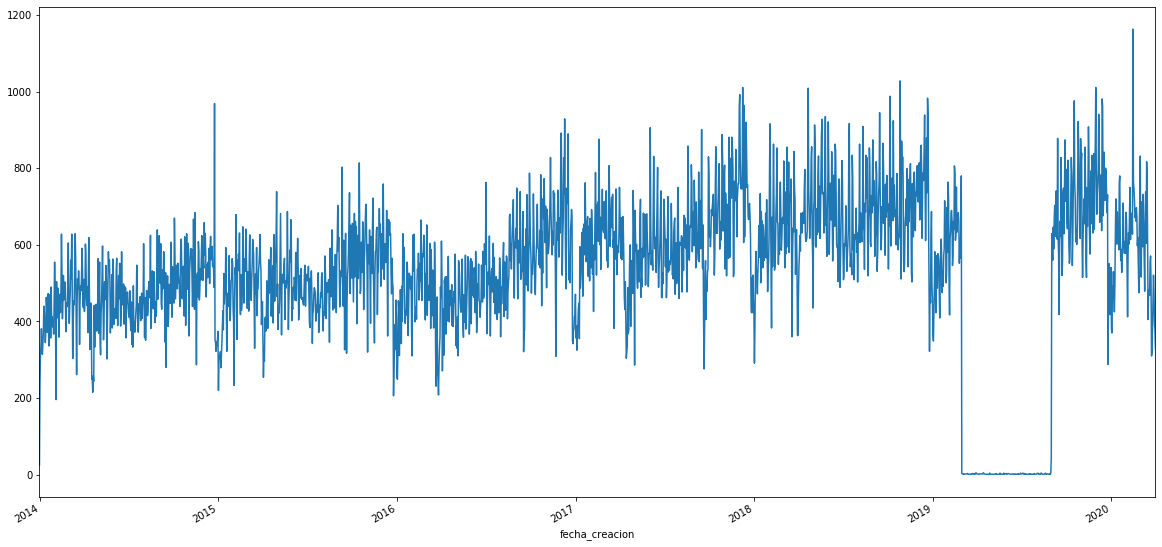

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
datos_copy.groupby('fecha_creacion').folio.count().plot()

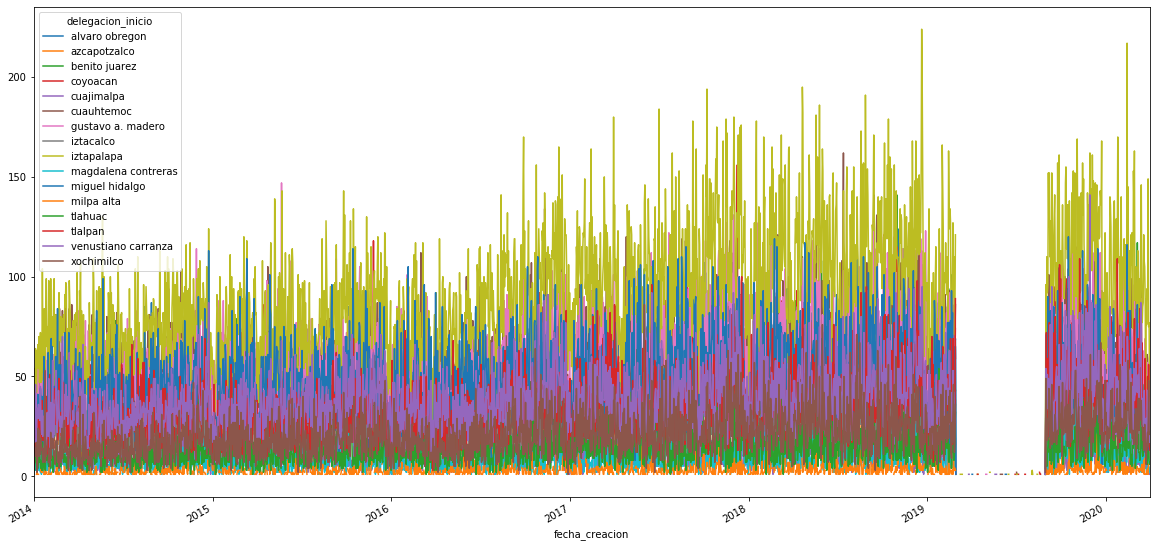

In [19]:
datos_copy.groupby(['fecha_creacion','delegacion_inicio']).folio.count().unstack(level=1).plot()

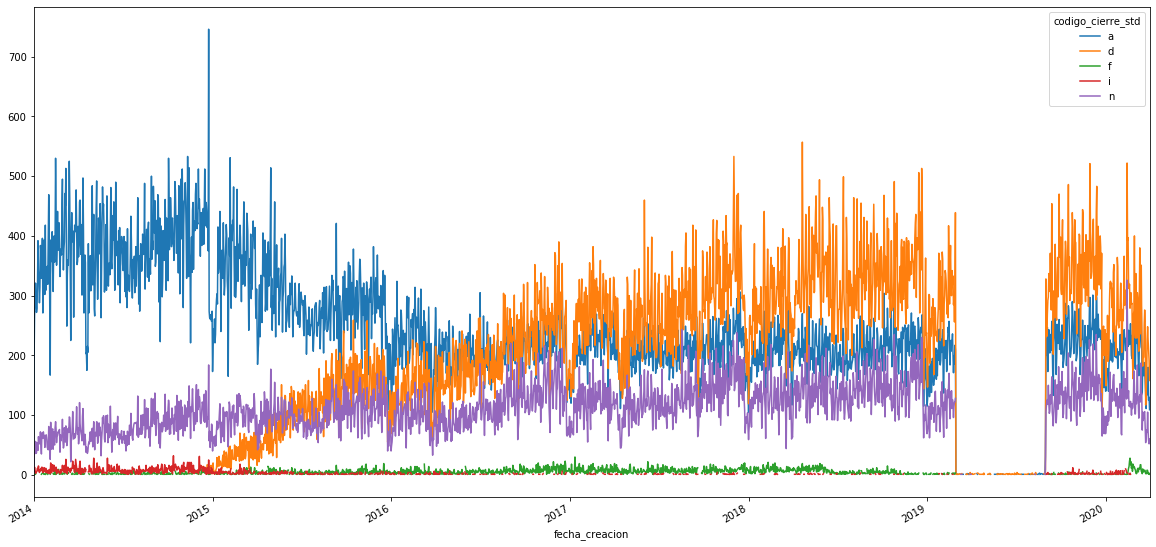

In [20]:
datos_copy.groupby(['fecha_creacion','codigo_cierre_std']).folio.count().unstack(level=1).plot()

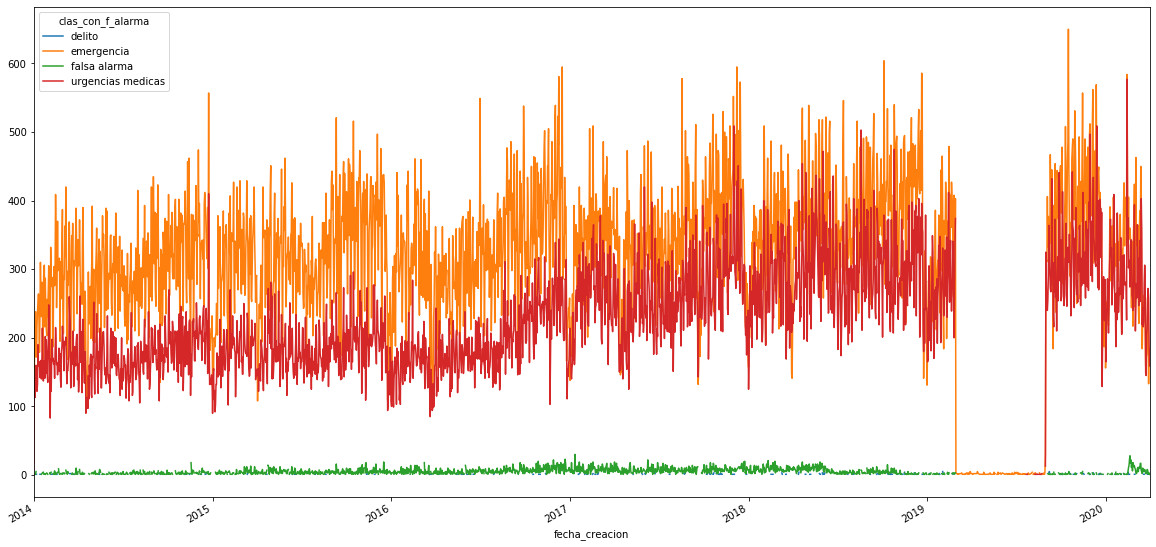

In [21]:
datos_copy.groupby(['fecha_creacion','clas_con_f_alarma']).folio.count().unstack(level=1).plot()

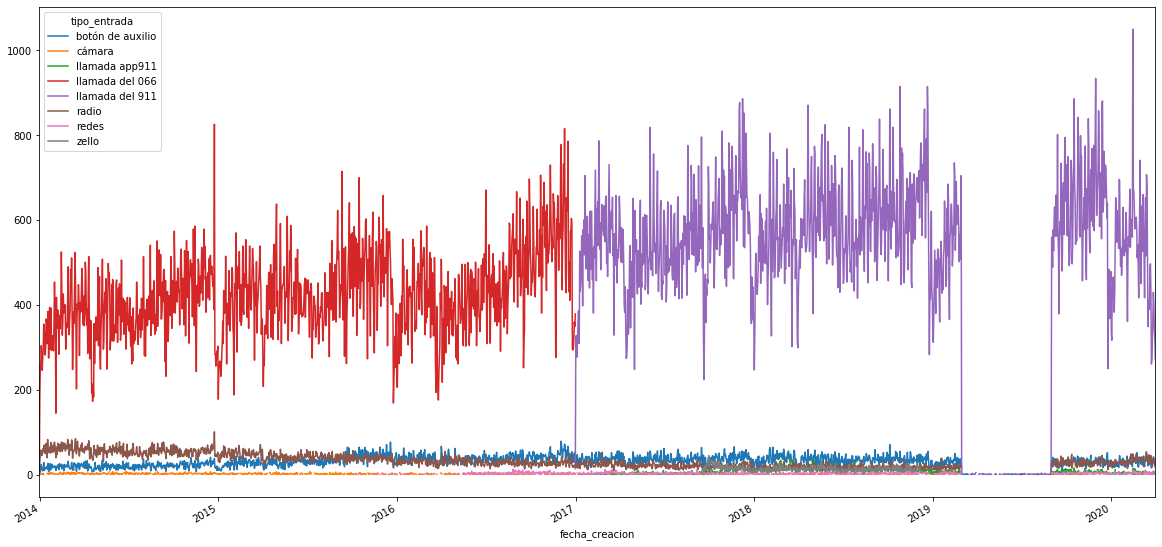

In [22]:
datos_copy.groupby(['fecha_creacion','tipo_entrada']).folio.count().unstack(level=1).plot()